# Notebook Summary
In this notebook I test various decision tree based models

In [1]:
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import Classes

In [2]:
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pickle in Data

In [3]:
# Pickle in factorized data

path = r"C:\Users\Andrew\Documents\Metis\TikTok_Hit_Predictor\Pickle\supervised_factorized.pkl"

df_factorized = pickle.load(open(path,'rb'))
df_factorized.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,spotify_artists,success
0,0.880,0.501,2.0,-6.774,1.0,0.062,0.0494,0.0695,0.4360,0.459,120.038,2020.0,0,1.0
1,0.935,0.454,1.0,-7.509,1.0,0.375,0.0194,0.0000,0.0824,0.357,133.073,2018.0,1,1.0


In [4]:
# Pickle in dummied data

path = r"C:\Users\Andrew\Documents\Metis\TikTok_Hit_Predictor\Pickle\supervised_dummy.pkl"

df_dummy = pickle.load(open(path,'rb'))
df_dummy.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,spotify_artists_Yes,spotify_artists_Yusuf / Cat Stevens,spotify_artists_Yves Montand,spotify_artists_ZZ Top,spotify_artists_Zofia Dromlewiczowa,spotify_artists_blink-182,spotify_artists_other,spotify_artists_Трумен Капоте,spotify_artists_Эрих Мария Ремарк,spotify_artists_Эрнест Хемингуэй
0,0.880,0.501,2.0,-6.774,1.0,0.062,0.0494,0.0695,0.4360,0.459,...,0,0,0,0,0,0,1,0,0,0
1,0.935,0.454,1.0,-7.509,1.0,0.375,0.0194,0.0000,0.0824,0.357,...,0,0,0,0,0,0,1,0,0,0


# 1.A) Random Forest - Factorized artists

In [5]:
# Seperate features from label

X = df_factorized.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year','spotify_artists']]

y = df_factorized['success']

I elect to only use a train / test split due to a limited dataset ~7,500 rows

In [6]:
#Split data into 3: 80% train,20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
# Oversample training data
ada = ADASYN(random_state=42)
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [8]:
# run random forest
clf = RandomForestClassifier()
clf.fit(X_adasyn_tr, y_adasyn_tr)
y_predict = clf.predict(X_test)

In [9]:
Classes.train_scores(clf,X_adasyn_tr, y_adasyn_tr)

Train Scores
Accuracy score: 100.00%


In [10]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  93.81%
F1 score:  78.84%
Precision:  68.34%,  Test Recall:  93.16%


# 1.B) Random Forest - Dummy artists

In [11]:
# Seperate features from label

X = df_dummy.drop(['success'],axis=1)

y = df_dummy['success']

In [12]:
#Split data into 3: 80% train,20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [13]:
# Oversample training data
ada = ADASYN(random_state=42)
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [14]:
# run random forest
clf = RandomForestClassifier()
clf.fit(X_adasyn_tr, y_adasyn_tr)
y_predict = clf.predict(X_test)

In [15]:
Classes.train_scores(clf,X_adasyn_tr, y_adasyn_tr)

Train Scores
Accuracy score: 100.00%


In [16]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  81.89%
F1 score:  26.06%
Precision:  26.34%,  Test Recall:  25.79%


It seems that we have dimensionality problems here and so the score is much lower

# 2A) Balanced Random Forest Classifier 

In [35]:
# Seperate features from label

X = df_factorized.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year','spotify_artists']]

y = df_factorized['success']

In [36]:
#Split data into 3: 80% train,20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [37]:
model = BalancedRandomForestClassifier(n_estimators=10)

In [38]:
# run model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [39]:
Classes.train_scores(model,X_train, y_train)

Train Scores
Accuracy score:  94.19%


In [40]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  94.01%
F1 score:  80.17%
Precision:  67.88%,  Test Recall:  97.89%


Text(93.77777777777786, 0.5, 'actual')

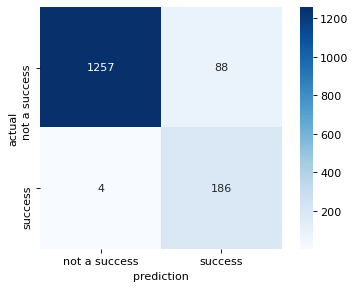

In [47]:
# Plot confusion matrix
success_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=80)
sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
        xticklabels=['not a success', 'success'],
        yticklabels=['not a success', 'success']);
plt.xlabel('prediction')
plt.ylabel('actual')

In [48]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [49]:
feature_importances

,importance
spotify_artists,0.600176
year,0.181952
danceability,0.032358
acousticness,0.027420
liveness,0.025121
speechiness,0.024282
valence,0.023688
energy,0.022499
loudness,0.017514
instrumentalness,0.016586


### Save feature importance as a csv

In [52]:
# Designate path

path='C:\\Users\\Andrew\\Documents\\Metis\\TikTok_Hit_Predictor\\Pickle\\'

feature_importances.to_csv(os.path.join(path,r'brfc_feature_importance.csv'))

### Pickle Model

In [50]:
# Pickle the model

# Pickle model
path = r"C:\Users\Andrew\Documents\Metis\TikTok_Hit_Predictor\Pickle\brfc_model.pkl"
pickle.dump(model, open(path, 'wb'))

# 2B) Balanced Random Forest Classifier - no artists

In [6]:
# Seperate features from label

X = df_factorized.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year']]

y = df_factorized['success']

In [7]:
#Split data into 3: 80% train,20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [8]:
model = BalancedRandomForestClassifier(n_estimators=10)

In [9]:
# run model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [10]:
Classes.train_scores(model,X_train, y_train)

Train Scores
Accuracy score:  75.94%


In [11]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  66.45%
F1 score:  33.03%
Precision:  21.93%,  Test Recall:  66.84%


I don't like how the BRFC with artists depends so much on artists and essentiall excludes all other features.  However, without Artists's model performance suffers significantly

# 3) Balanced Bagging Classifier

In [29]:
# Seperate features from label

X = df_factorized.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','year','spotify_artists']]

y = df_factorized['success']

In [30]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [31]:
# define model
model = BalancedBaggingClassifier()

In [32]:
# run model
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [33]:
Classes.train_scores(model,X_train, y_train)

Train Scores
Accuracy score:  94.79%


In [34]:
Classes.test_scores(y_test,y_predict)

Test Scores
Score:  92.96%
F1 score:  77.59%
Precision:  64.04%,  Test Recall:  98.42%
